In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import rpy2.robjects as robjects
import pyreadr
import matplotlib.cm as cm
color_map  = cm.get_cmap('tab20c')

from collections import defaultdict

In [3]:
tridiag1_p50_m1_mean = np.array([274.4777,	205.2697,	127.4586,	15.10269,	15.10234,	15.10164,	15.14748,	15.10133])
tridiag1_p50_m1_std = np.array([12.40028,	11.12433,	6.575019,	0.7857598,	0.7865693,	0.7868148,	0.7927674,	0.7869135])

tridiag1_p50_m2_mean = np.array([274.3334,	204.9789,	127.4739,	15.09702,	15.0949,	15.09392,	15.13926,	15.09406])
tridiag1_p50_m2_std = np.array([12.48101,	10.34629,	6.234595,	0.7394583,	0.7362514,	0.7367064,	0.7410049,	0.7367077])


tridiag2_p50_m1_mean = np.array([329.8712,	245.3309,	158.4369,	18.70216,	18.69984,	18.69868,	18.74223,	18.69831])
tridiag2_p50_m1_std = np.array([15.34505,	13.43384,	8.974294,	1.058376,	1.056563,	1.056548,	1.063895,	1.056569])


tridiag2_p50_m2_mean = np.array([329.8032,	244.2846,	156.9894,	18.53956,	18.53594,	18.5354,	18.57978,	18.53501])
tridiag2_p50_m2_std = np.array([13.49062,	11.92586,	8.217792,	0.9591832,	0.9578811,	0.9580959,	0.9685901,	0.9579882])


tridiag3_p50_m1_mean = np.array([313.7908,	236.3969,	154.1657,	18.185,	18.18335,	18.18239,	18.21492,	18.18174])
tridiag3_p50_m1_std = np.array([14.77635,	15.34687,	8.86926,	1.021386,	1.022262,	1.022597,	1.023177,	1.022512])


tridiag3_p50_m2_mean = np.array([314.5932,	236.4738,	154.2429,	18.19591,	18.19295,	18.19172,	18.22245,	18.19093])
tridiag3_p50_m2_std = np.array([14.87638,	15.96019,	9.400796,	1.093559,	1.093125,	1.093539,	1.096444,	1.093519])


power_p50_m1_mean = np.array([1409.665,	1059.108,	730.0264,	85.50065,	85.50168,	85.4925,	85.26589,	85.48375])
power_p50_m1_std = np.array([0,	0,	0,	0,	0,	0,	0,	0])


power_p50_m2_mean = np.array([1425.517,	1136.793,	767.4881,	90.05904,	90.06357,	90.05266,	89.9339,	90.04604])
power_p50_m2_std = np.array([0,	0,	0,	0,	0,	0,	0,	0])



tridiag1_p50_coor_mean = np.array([0.9984226,	0.9971373,	0.9954886,	0.9938516,	0.9908975,	0.9868606,	0.9820489,	0.9771274,	0.9688248,	8.143412e-17,	1.619888e-17,	3.850619e-18,	-1.36197e-18,	-5.260818e-18,	-2.496895e-17,	-5.711235e-16,	-1.129532e-15])
tridiag1_p50_coor_std  = np.array([0.000370609,	0.0004702546,	0.0004924467,	0.001079001,	0.001054602,	0.00219292,	0.003143399,	0.002988241,	0.00429894,	7.157953e-17,	1.712925e-17,	4.484263e-18,	3.380083e-18,	7.047153e-18,	3.216865e-17,	1.821978e-16,	2.237201e-16]) 


tridiag2_p50_coor_mean = np.array([0.9972925,	0.9959812,	0.9945897,	0.9920138,	0.989981,	0.9869418,	0.9819285,	0.9774027,	0.9680083,	7.3914e-17,	1.589922e-17,	4.958355e-18,	-2.116931e-18,	-7.240523e-18,	-7.918521e-17,	-5.49714e-16,	-9.984023e-16])
tridiag2_p50_coor_std  = np.array([0.0003243955,	0.0006888119,	0.0007927961,	0.000915407,	0.0009805439,	0.001029847,	0.001588363,	0.002671258,	0.004920868,	1.13511e-16,	2.067389e-17,	1.157687e-17,	2.963049e-18,	7.371633e-18,	1.160434e-16,	2.193935e-16,	3.232971e-16])

tridiag3_p50_coor_mean = np.array([0.9977675,	0.9961174,	0.99432,	0.9926349,	0.9905364,	0.986994,	0.9824076,	0.9746432,	0.9664527,	6.026931e-17,	7.993629e-18,	5.376653e-19,	-1.872874e-18,	-4.326675e-18,	-1.826242e-17,	-5.840364e-16,	-1.157519e-15])
tridiag3_p50_coor_std  = np.array([0.0003810108,	0.0005338677,	0.0009306944,	0.001399492,	0.001005574,	0.001498176,	0.002704301,	0.003480704,	0.006486988,	5.240796e-17,	1.403366e-17,	4.741618e-18,	5.790577e-18,	7.61872e-18,	2.104028e-17,	1.433311e-16,	3.402172e-16])

power_p50_coor_mean = np.array([0.998819,	0.9981053,	0.9979887,	0.9966856,	0.9960213,	0.9943445,	0.9935297,	0.990524,	0.9858987,	1.72662e-15,	3.323326e-17,	4.594522e-18,	1.682815e-19,	-1.352252e-17,	-2.731596e-17,	-3.055755e-17,	-6.662127e-16])
power_p50_coor_std  = np.array([0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0])




In [4]:
tridiag1_p100_m1_mean = np.array([611.9816,	463.283,	290.6539,	34.47716,	34.47248,	34.47015,	34.58532,	34.47029])
tridiag1_p100_m1_std = np.array([20.65085,	16.90837,	14.58121,	1.6031,	1.601483,	1.60144,	1.607561,	1.601581])

tridiag2_p100_m1_mean = np.array([754.9809,	574.4876,	385.0675,	45.31749,	45.31421,	45.31005,	45.36739,	45.30911])
tridiag2_p100_m1_std = np.array([22.17299,	12.79729,	19.90355,	2.20247,	2.202224,	2.203159,	2.232819,	2.203715])

tridiag3_p100_m1_mean = np.array([556.8009,	403.6392,	249.1867,	29.55696,	29.54832,	29.54582,	29.65548,	29.54561])
tridiag3_p100_m1_std = np.array([19.30329,	23.01113,	21.27526,	2.368525,	2.367168,	2.36694,	2.405247,	2.367598])

power_p100_m1_mean = np.array([3027.334,	2272.2,	1537.466,	180.8819,	180.8795,	180.8634,	180.9685,	180.8493])
power_p100_m1_std = np.array([0,	0,	0,	0,	0,	0,	0,	0])


tridiag1_p100_m2_mean = np.array([610.5506,	462.1758,	289.9149,	34.36563,	34.35848,	34.35678,	34.47638,	34.35629])
tridiag1_p100_m2_std = np.array([22.36107,	18.32016,	14.41281,	1.588216,	1.588762,	1.588962,	1.604858,	1.589504])

tridiag2_p100_m2_mean = np.array([757.7526,	574.7327,	384.3108,	45.24902,	45.24155,	45.2369,	45.29244,	45.23513])
tridiag2_p100_m2_std = np.array([22.7103,	12.83128,	19.7123,	2.173286,	2.170958,	2.171022,	2.178557,	2.170526])

tridiag3_p100_m2_mean = np.array([555.0665,	406.0155,	247.9686,	29.42994,	29.42464,	29.42258,	29.53437,	29.42262])
tridiag3_p100_m2_std = np.array([20.87552,	20.16661,	21.60409,	2.410847,	2.410383,	2.409681,	2.446282,	2.410423])

power_p100_m2_mean = np.array([3002.795,	2239.777,	1526.602,	179.5664,	179.5474,	179.5399,	180.2832,	179.541])
power_p100_m2_std = np.array([0,	0,	0,	0,	0,	0,	0,	0])


tridiag1_p100_coor_mean = np.array([0.9980483,	0.9962067,	0.9949118,	0.9934067,	0.9905188,	0.9878473,	0.983432,	0.9780017,	0.9668694,	4.580381e-17,	1.074751e-17,	3.766734e-19,	-7.782096e-19,	-2.167796e-18,	-7.268083e-17,	-5.840272e-16,	-1.193811e-15])
tridiag1_p100_coor_std = np.array([0.0003100831,	0.0006397873,	0.000781499,	0.0007890034,	0.0009796658,	0.001767377,	0.001346215,	0.003368482,	0.003486131,	1.218881e-16,	2.985232e-17,	1.708287e-18,	1.480037e-18,	3.007638e-18,	7.792238e-17,	2.35252e-16,	3.386815e-16])

tridiag2_p100_coor_mean = np.array([0.9975697,	0.995918,	0.9948944,	0.992572,	0.9899885,	0.986836,	0.983182,	0.977036,	0.9670167,	7.020967e-17,	2.331632e-17,	3.283524e-18,	5.215113e-20,	-2.773273e-18,	-2.794817e-17,	-6.711673e-16,	-1.202906e-15])
tridiag2_p100_coor_std = np.array([0.0004893262,	0.0004268637,	0.0007490453,	0.0009733453,	0.001441809,	0.002410221,	0.002564218,	0.00261056,	0.003359891,	7.666179e-17,	5.288852e-17,	7.113471e-18,	5.518927e-18,	5.581136e-18,	5.601548e-17,	6.152861e-17,	2.962796e-16])


tridiag3_p100_coor_mean = np.array([0.998903,	0.9970879,	0.9951837,	0.9934585,	0.9909565,	0.987879,	0.9834731,	0.9754632,	0.9683898,	4.832888e-17,	1.527448e-17,	3.462437e-18,	-1.517108e-18,	-1.10825e-17,	-3.699741e-17,	-6.619666e-16,	-1.181907e-15])
tridiag3_p100_coor_std = np.array([0.0002285398,	0.0005669184,	0.0006243497,	0.0009557303,	0.001537243,	0.001957483,	0.002679604,	0.004248127,	0.003698241,	2.987182e-17,	1.667642e-17,	9.063817e-18,	6.724783e-18,	1.917788e-17,	3.47943e-17,	5.181021e-17,	2.780144e-16])

power_p100_coor_mean = np.array([0.9990565,	0.9981305,	0.9974311,	0.9970217,	0.9959303,	0.9942108,	0.9929512,	0.9913353,	0.9897142,	2.098096e-15,	1.039516e-16,	9.952267e-17,	5.756473e-18,	8.268543e-20,	-7.048372e-19,	-8.303179e-18,	-6.661875e-16])
power_p100_coor_std = np.array([0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0])

In [5]:
tridiag1_p150_m1_mean = np.array([874.3997,	655.3005,	412.4098,	48.84598,	48.83732,	48.8335,	49.02329,	48.83371])
tridiag1_p150_m1_std = np.array([33.62786,	31.92702,	19.17274,	2.101837,	2.10411,	2.10509,	2.096995,	2.105198])

tridiag2_p150_m1_mean = np.array([942.3864,	696.0021,	448.2422,	52.92305,	52.91754,	52.91416,	53.04292,	52.91306])
tridiag2_p150_m1_std = np.array([43.33439,	36.03532,	20.33537,	2.347714,	2.348957,	2.348535,	2.325489,	2.347763])

tridiag3_p150_m1_mean = np.array([925.094,	698.7753,	457.0275,	53.9485,	53.9385,	53.93448,	54.07515,	53.93339])
tridiag3_p150_m1_std = np.array([32.96795,	39.60302,	37.32339,	4.291578,	4.291273,	4.291325,	4.342597,	4.291521])

power_p150_m1_mean = np.array([4806.577,	3556.196,	2233.537,	264.6095,	264.5661,	264.5493,	265.5409,	264.5517])
power_p150_m1_std = np.array([0,	0,	0,	0,	0,	0,	0,	0])


tridiag1_p150_m2_mean = np.array([876.4886,	656.7819,	413.8184,	49.0161,	49.00566,	49.0023,	49.20089,	49.00276])
tridiag1_p150_m2_std = np.array([35.66521,	31.50929,	21.96806,	2.411706,	2.413245,	2.414379,	2.419527,	2.413561])

tridiag2_p150_m2_mean = np.array([941.0514,	694.3807,	448.7331,	53.01954,	53.01162,	53.00747,	53.1283,	53.00634])
tridiag2_p150_m2_std = np.array([45.23759,	40.04496,	20.00716,	2.36167,	2.363502,	2.362826,	2.344747,	2.362469])

tridiag3_p150_m2_mean = np.array([925.0623,	696.2691,	453.0443,	53.4973,	53.48665,	53.48298,	53.6273,	53.48171])
tridiag3_p150_m2_std = np.array([35.01123,	38.76489,	39.46911,	4.562945,	4.557768,	4.558914,	4.626222,	4.560271])

power_p150_m2_mean = np.array([4989.896,	3741.406,	2289.805,	272.7046,	272.7023,	272.6796,	274.1836,	272.6889])
power_p150_m2_std = np.array([0,	0,	0,	0,	0,	0,	0,	0])


tridiag1_p150_coor_mean = np.array([0.9982158,	0.9967731,	0.9952739,	0.9937363,	0.9910108,	0.9877938,	0.982916,	0.977925,	0.9699267,	5.604275e-17,	2.045201e-17,	1.367605e-18,	-7.845513e-19,	-8.438956e-18,	-4.727223e-17,	-6.634824e-16,	-1.192734e-15])
tridiag1_p150_coor_std = np.array([0.0003076377,	0.0004995505,	0.0003994877,	0.0006427514,	0.001303029,	0.001093745,	0.002612388,	0.00318623,	0.004944572,	6.24082e-17,	2.380301e-17,	2.995252e-18,	2.849058e-18,	1.305921e-17,	5.478973e-17,	2.535554e-18,	2.318087e-16])

tridiag2_p150_coor_mean = np.array([0.9972448,	0.9959693,	0.9947471,	0.9922566,	0.9900681,	0.9866327,	0.9821834,	0.9749136,	0.9679901,	9.468502e-17,	9.217972e-18,	8.072342e-19,	3.119361e-19,	-6.919408e-18,	-4.651646e-17,	-5.915718e-16,	-9.917325e-16])
tridiag2_p150_coor_std = np.array([0.000519004,	0.0003535139,	0.0004787645,	0.001167851,	0.001220023,	0.001865337,	0.001944985,	0.003570129,	0.004307153,	1.538125e-16,	1.57318e-17,	1.012661e-18,	6.268979e-19,	1.579982e-17,	5.737068e-17,	1.70768e-16,	3.380322e-16])

tridiag3_p150_coor_mean = np.array([0.9977608,	0.9964859,	0.9948001,	0.9921204,	0.9902201,	0.9868139,	0.9828263,	0.9774604,	0.9679149,	7.13726e-17,	1.01589e-17,	7.504826e-20,	-6.379945e-18,	-1.770608e-17,	-2.973231e-17,	-5.847663e-16,	-9.854106e-16])
tridiag3_p150_coor_std = np.array([0.0003838397,	0.0003232192,	0.000915629,	0.001265679,	0.002021515,	0.001758455,	0.002067135,	0.002310363,	0.004968811,	6.636474e-17,	1.504275e-17,	2.19544e-18,	2.031587e-17,	2.97176e-17,	3.889497e-17,	9.013148e-17,	3.448037e-16])

power_p150_coor_mean = np.array([0.9989134,	0.9986811,	0.9982118,	0.9976126,	0.995698,	0.9939287,	0.9926462,	0.991492,	0.9886481,	1.985621e-15,	1.947099e-17,	1.373227e-17,	9.971689e-18,	-1.900957e-18,	-8.16118e-18,	-1.231559e-17,	-6.663536e-16])
power_p150_coor_std = np.array([0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0])

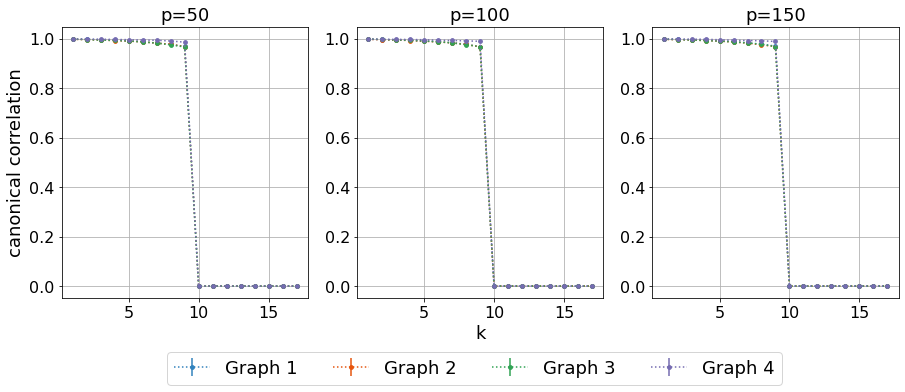

In [16]:
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
m_size=7.5
fig, ax = plt.subplots(1, 3, figsize=(15,5))

x_label = np.arange(17)+1
ax[0].errorbar(x=x_label, y=tridiag1_p50_coor_mean, yerr=tridiag1_p50_coor_std, fmt=':.',markersize=m_size, label='Graph 1', color=color_map(0))
ax[0].errorbar(x=x_label, y=tridiag2_p50_coor_mean, yerr=tridiag2_p50_coor_std, fmt=':.',markersize=m_size, label='Graph 2', color=color_map(4))
ax[0].errorbar(x=x_label, y=tridiag3_p50_coor_mean, yerr=tridiag3_p50_coor_std, fmt=':.',markersize=m_size, label='Graph 3', color=color_map(8))
ax[0].errorbar(x=x_label, y=power_p50_coor_mean,    yerr=power_p50_coor_std, fmt=':.', markersize=m_size, label='Graph 4', color=color_map(12))
ax[0].grid()
ax[0].set_title('p=50', fontsize=18)

ax[1].errorbar(x=x_label, y=tridiag1_p100_coor_mean, yerr=tridiag1_p100_coor_std, fmt=':.',markersize=m_size, label='Graph 1', color=color_map(0))
ax[1].errorbar(x=x_label, y=tridiag2_p100_coor_mean, yerr=tridiag2_p100_coor_std, fmt=':.',markersize=m_size, label='Graph 2', color=color_map(4))
ax[1].errorbar(x=x_label, y=tridiag3_p100_coor_mean, yerr=tridiag3_p100_coor_std, fmt=':.',markersize=m_size, label='Graph 3', color=color_map(8))
ax[1].errorbar(x=x_label, y=power_p100_coor_mean,    yerr=power_p100_coor_std, fmt=':.',markersize=m_size, label='Graph 4',  color=color_map(12))
ax[1].grid()
ax[1].set_title('p=100', fontsize=18)
x_label = np.arange(17)+1


ax[2].errorbar(x=x_label, y=tridiag1_p150_coor_mean, yerr=tridiag1_p150_coor_std, fmt=':.',markersize=m_size, label='Graph 1', color=color_map(0))
ax[2].errorbar(x=x_label, y=tridiag2_p150_coor_mean, yerr=tridiag2_p150_coor_std, fmt=':.',markersize=m_size, label='Graph 2', color=color_map(4))
ax[2].errorbar(x=x_label, y=tridiag3_p150_coor_mean, yerr=tridiag3_p150_coor_std, fmt=':.',markersize=m_size, label='Graph 3', color=color_map(8))
ax[2].errorbar(x=x_label, y=power_p150_coor_mean,    yerr=power_p150_coor_std, fmt=':.',markersize=m_size, label='Graph 4', color=color_map(12))
ax[2].grid()
ax[2].set_title('p=150', fontsize=18)
ax[1].set_xlabel('k', fontsize=18)

handles, labels = ax[0].get_legend_handles_labels()

fig.legend(handles, labels, ncol=5, bbox_to_anchor=(.8, -0.0), prop={'size': 18})
ax[0].set_ylabel('canonical correlation', fontsize=18)
fig.savefig('cca_varyk'+'.png', bbox_inches='tight')


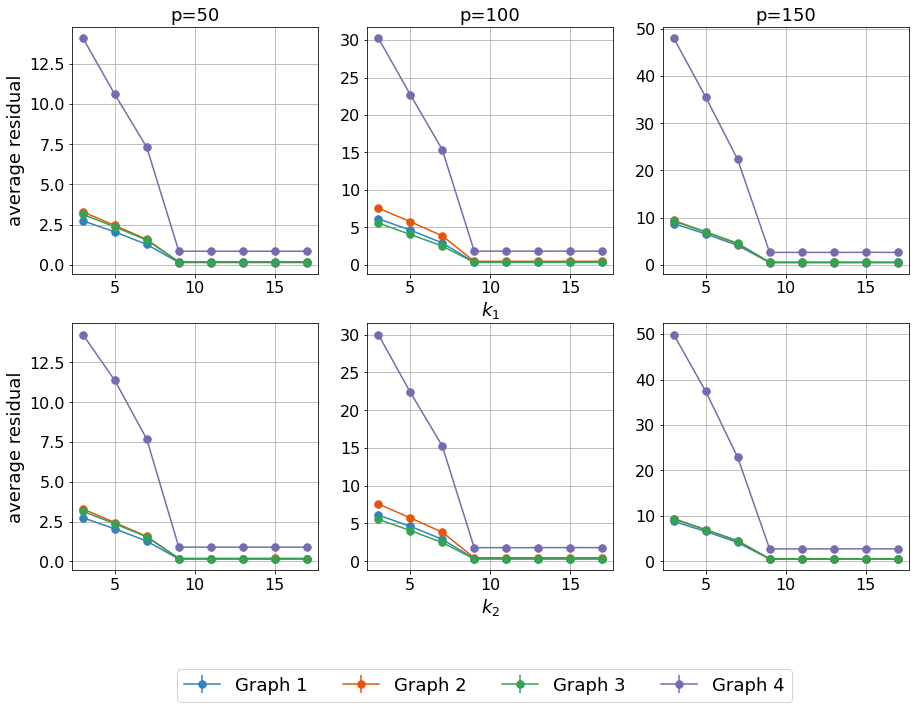

In [14]:
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
m_size=7.5
fig, ax = plt.subplots(2, 3, figsize=(15,10))

x_label = np.array([3, 5, 7, 9, 11, 13, 15,17])
ax[0, 0].errorbar(x=x_label, y=tridiag1_p50_m1_mean/100, yerr=tridiag1_p50_m1_std/100, fmt='-o',markersize=m_size, label='Graph 1', color=color_map(0))
ax[0, 0].errorbar(x=x_label, y=tridiag2_p50_m1_mean/100, yerr=tridiag2_p50_m1_std/100, fmt='-o',markersize=m_size, label='Graph 2', color=color_map(4))
ax[0, 0].errorbar(x=x_label, y=tridiag3_p50_m1_mean/100, yerr=tridiag3_p50_m1_std/100, fmt='-o',markersize=m_size, label='Graph 3',  color=color_map(8))
ax[0, 0].errorbar(x=x_label, y=power_p50_m1_mean/100,    yerr=power_p50_m1_std/100, fmt='-o',markersize=m_size, label='Graph 4', color=color_map(12))

ax[0, 0].grid()

ax[0, 1].errorbar(x=x_label, y=tridiag1_p100_m1_mean/100, yerr=tridiag1_p100_m1_std/100, fmt='-o',markersize=m_size, color=color_map(0))
ax[0, 1].errorbar(x=x_label, y=tridiag2_p100_m1_mean/100, yerr=tridiag2_p100_m1_std/100, fmt='-o',markersize=m_size, color=color_map(4))
ax[0, 1].errorbar(x=x_label, y=tridiag3_p100_m1_mean/100, yerr=tridiag3_p100_m1_std/100, fmt='-o',markersize=m_size, color=color_map(8))
ax[0, 1].errorbar(x=x_label, y=power_p100_m1_mean/100,    yerr=power_p100_m1_std/100, fmt='-o',markersize=m_size, color=color_map(12))

ax[0, 1].grid()

ax[0, 2].errorbar(x=x_label, y=tridiag1_p150_m1_mean/100, yerr=tridiag1_p150_m1_std/100, fmt='-o',markersize=m_size, color=color_map(0))
ax[0, 2].errorbar(x=x_label, y=tridiag2_p150_m1_mean/100, yerr=tridiag2_p150_m1_std/100, fmt='-o',markersize=m_size, color=color_map(4))
ax[0, 2].errorbar(x=x_label, y=tridiag3_p150_m1_mean/100, yerr=tridiag3_p150_m1_std/100, fmt='-o',markersize=m_size, color=color_map(8))
ax[0, 2].errorbar(x=x_label, y=power_p150_m1_mean/100,    yerr=power_p150_m1_std/100, fmt='-o',markersize=m_size, color=color_map(12))

ax[0, 2].grid()

x_label = np.array([3, 5, 7, 9, 11, 13, 15,17])
ax[1, 0].errorbar(x=x_label, y=tridiag1_p50_m2_mean/100, yerr=tridiag1_p50_m2_std/100, fmt='-o',markersize=m_size, color=color_map(0))
ax[1, 0].errorbar(x=x_label, y=tridiag2_p50_m2_mean/100, yerr=tridiag2_p50_m2_std/100, fmt='-o',markersize=m_size, color=color_map(4))
ax[1, 0].errorbar(x=x_label, y=tridiag3_p50_m2_mean/100, yerr=tridiag3_p50_m2_std/100, fmt='-o',markersize=m_size, color=color_map(8))
ax[1, 0].errorbar(x=x_label, y=power_p50_m2_mean/100,    yerr=power_p50_m2_std/100, fmt='-o',markersize=m_size, color=color_map(12))
ax[1, 0].grid()

ax[1, 1].errorbar(x=x_label, y=tridiag1_p100_m2_mean/100, yerr=tridiag2_p100_m2_std/100, fmt='-o',markersize=m_size, color=color_map(0))
ax[1, 1].errorbar(x=x_label, y=tridiag2_p100_m2_mean/100, yerr=tridiag2_p100_m2_std/100, fmt='-o',markersize=m_size, color=color_map(4))
ax[1, 1].errorbar(x=x_label, y=tridiag3_p100_m2_mean/100, yerr=tridiag3_p100_m2_std/100, fmt='-o',markersize=m_size, color=color_map(8))
ax[1, 1].errorbar(x=x_label, y=power_p100_m2_mean/100,    yerr=power_p100_m2_std/100, fmt='-o',markersize=m_size, color=color_map(12))
ax[1, 1].grid()


ax[1, 2].errorbar(x=x_label, y=tridiag1_p150_m2_mean/100, yerr=tridiag1_p150_m2_std/100, fmt='-o',markersize=m_size, color=color_map(0))
ax[1, 2].errorbar(x=x_label, y=tridiag2_p150_m2_mean/100, yerr=tridiag2_p150_m2_std/100, fmt='-o',markersize=m_size, color=color_map(4))
ax[1, 2].errorbar(x=x_label, y=tridiag3_p150_m2_mean/100, yerr=tridiag3_p150_m2_std/100, fmt='-o',markersize=m_size, color=color_map(8))
ax[1, 2].errorbar(x=x_label, y=power_p150_m2_mean/100,    yerr=power_p150_m2_std/100, fmt='-o',markersize=m_size, color=color_map(12))
ax[1, 2].grid()


handles, labels = ax[0, 0].get_legend_handles_labels()

fig.legend(handles, labels, ncol=5, bbox_to_anchor=(.8, -0.0), prop={'size': 18})
ax[0, 0].set_ylabel('average residual', fontsize=18)
ax[1, 0].set_ylabel('average residual', fontsize=18)
ax[0, 1].set_xlabel(r'$k_1$', fontsize=18)
ax[1, 1].set_xlabel(r'$k_2$', fontsize=18)
ax[0, 0].set_title("p=50", fontsize=18)
ax[0, 1].set_title("p=100", fontsize=18)
ax[0, 2].set_title("p=150", fontsize=18)
fig.savefig('elbo_varykm'+'.pdf', bbox_inches='tight')
